In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
X_train = pd.read_csv('data-sets\Xtrainphoneme.txt', header=None).to_numpy()
X_train = np.delete(X_train, -1, axis=-1)
Z_train = pd.read_csv('data-sets\Ztrainphoneme.txt', header=None).to_numpy().T

X_test = pd.read_csv('data-sets\Xtestphoneme.txt', header=None).to_numpy()
X_test = np.delete(X_test, -1, axis=-1)
Z_test = pd.read_csv('data-sets\Ztestphoneme.txt', header=None).to_numpy().T

In [3]:
X_train.shape

(300, 256)

In [5]:
scaler = StandardScaler(with_mean=True, with_std=False)
X_train_cent = scaler.fit_transform(X_train)
X_test_cent  = scaler.transform(X_test)

Z_train_cent = Z_train - Z_train.mean()
Z_test_cent  = Z_test - Z_train.mean()   # center with training mean

standard model - OLS

In [10]:
ols_model = LinearRegression(fit_intercept=False)  # already centered
ols_model.fit(X_train_cent, Z_train_cent)
ols_preds_cent = ols_model.predict(X_test_cent)
ols_preds = Z_train.mean() + ols_preds_cent   # add mean back

ols_errors = ols_preds - Z_test
ols_log_errors = np.log(ols_errors**2 + 1e-8)

ols_results = pd.DataFrame({
                            "Log Squared Error": np.ndarray.flatten(ols_log_errors),
                            "Model": "OLS"
                        })

PCR for q = 2,...,20 PCs

In [8]:
results = []
for q in range(2, 21):
    pca = PCA(n_components=q)
    X_train_reduced = pca.fit_transform(X_train_cent)
    X_test_reduced  = pca.transform(X_test_cent)

    pc_model = LinearRegression(fit_intercept=False)
    pc_model.fit(X_train_reduced, Z_train_cent)
    
    preds_cent = pc_model.predict(X_test_reduced)
    preds = Z_train.mean() + preds_cent
    
    errors = preds - Z_test
    log_errors = np.log(errors**2 + 1e-8)
    
    results.append(pd.DataFrame({
        "Log Squared Error": np.ndarray.flatten(log_errors),
        "Model": f"PCR-{q}"
    }))

combine results

In [12]:
results.append(ols_results)
results_df = pd.concat(results, ignore_index=True)

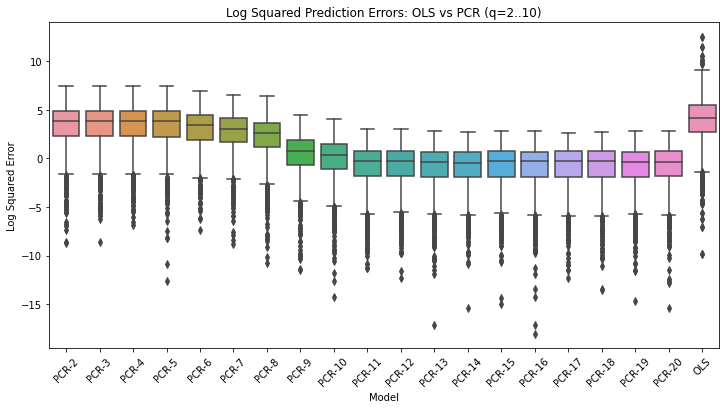

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Model", y="Log Squared Error", data=results_df)
plt.xticks(rotation=45)
plt.title("Log Squared Prediction Errors: OLS vs PCR (q=2..10)")
plt.show()